In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from shutil import copyfile
import matplotlib.pyplot as plt
import glob
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive

# Connect to Google Drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/UPDRS_SCORING.csv'

# Load data from CSV to pandas dataframe
parkinsons_data = pd.read_csv(file_path)


In [ ]:
# print first 5 rows of dataframe
parkinsons_data.tail()

,time,Sacr_x,Sacr_y,Spine_x,Spine_y,c7_x,c7_y,Head_x,Head_y,LShoulder_x,...,RThumb_y,x_min,y_min,x_max,y_max,UPDRS_gait,SAS_gait,age,sex,walk_name
273,4.066667,99.89635,100.0391,115.6237,-30.77309,133.9872,-182.9091,139.4838,-241.6474,43.17706,...,52.04062,-153.5668,-241.6474,408.7520,373.4758,0,0,-1,-1,2017_02_06__14_10_38_ID_03_state_1__1__kinect
274,4.100000,99.88910,100.0423,116.1497,-31.12426,135.1586,-183.9192,140.4506,-243.3325,43.35056,...,50.70367,-154.5477,-243.3325,404.4202,369.2294,0,0,-1,-1,2017_02_06__14_10_38_ID_03_state_1__1__kinect
275,4.133333,99.88153,100.0437,116.2495,-31.65797,135.3906,-185.3363,141.0518,-244.9222,43.07325,...,53.45487,-155.4911,-244.9222,399.6650,383.2962,0,0,-1,-1,2017_02_06__14_10_38_ID_03_state_1__1__kinect
276,4.166667,99.87011,100.0424,116.0355,-32.24338,134.9583,-186.8679,141.3742,-246.4768,42.47884,...,56.77681,-156.3900,-246.4768,394.5778,403.7421,0,0,-1,-1,2017_02_06__14_10_38_ID_03_state_1__1__kinect
277,4.200000,99.85355,100.0386,115.6169,-32.84418,134.0973,-188.4234,141.5378,-247.9255,41.66171,...,57.67425,-157.2910,-247.9255,389.4668,427.4714,0,0,-1,-1,2017_02_06__14_10_38_ID_03_state_1__1__kinect


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(278, 60)

In [ ]:
# get more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             278 non-null    float64
 1   Sacr_x           278 non-null    float64
 2   Sacr_y           278 non-null    float64
 3   Spine_x          278 non-null    float64
 4   Spine_y          278 non-null    float64
 5   c7_x             278 non-null    float64
 6   c7_y             278 non-null    float64
 7   Head_x           278 non-null    float64
 8   Head_y           278 non-null    float64
 9   LShoulder_x      278 non-null    float64
 10  LShoulder_y      278 non-null    float64
 11  LElbow_x         278 non-null    float64
 12  LElbow_y         278 non-null    float64
 13  LWrist_x         278 non-null    float64
 14  LWrist_y         278 non-null    float64
 15  LHand_x          278 non-null    float64
 16  LHand_y          278 non-null    float64
 17  RShoulder_x     

In [ ]:
# check for missing values
parkinsons_data.isnull().sum()

time               0
Sacr_x             0
Sacr_y             0
Spine_x            0
Spine_y            0
c7_x               0
c7_y               0
Head_x             0
Head_y             0
LShoulder_x        0
LShoulder_y        0
LElbow_x           0
LElbow_y           0
LWrist_x           0
LWrist_y           0
LHand_x            0
LHand_y            0
RShoulder_x        0
RShoulder_y        0
RElbow_x           0
RElbow_y           0
RWrist_x           0
RWrist_y           0
RHand_x            0
RHand_y            0
LHip_x             0
LHip_y             0
LKnee_x            0
LKnee_y            0
LAnkle_x           0
LAnkle_y           0
LFoot_x            0
LFoot_y            0
RHip_x             0
RHip_y             0
RKnee_x            0
RKnee_y            0
RAnkle_x           0
RAnkle_y           0
RFoot_x            0
RFoot_y            0
SpineShoulder_x    0
SpineShoulder_y    0
LHandTip_x         0
LHandTip_y         0
LThumb_x           0
LThumb_y           0
RHandTip_x   

In [ ]:
# get statistical information
parkinsons_data.describe()

,time,Sacr_x,Sacr_y,Spine_x,Spine_y,c7_x,c7_y,Head_x,Head_y,LShoulder_x,...,RThumb_x,RThumb_y,x_min,y_min,x_max,y_max,UPDRS_gait,SAS_gait,age,sex
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.0,278.0
mean,2.317266,100.018392,99.982765,112.344560,-1.950424,126.279908,-116.664406,139.678166,-161.776374,56.863843,...,149.674902,82.141660,-84.697945,-161.776374,365.378569,366.641553,0.543165,0.543165,-1.0,-1.0
std,1.369429,0.078977,0.043264,9.771656,18.671131,20.938260,42.030058,33.280432,51.291718,13.420098,...,32.921102,45.705244,36.785084,51.291718,57.295465,38.652691,0.499032,0.499032,0.0,0.0
min,0.000000,99.853550,99.738180,98.753040,-37.467520,97.408700,-200.226000,97.560350,-265.530200,24.260720,...,94.552500,29.730300,-160.385000,-265.530200,281.737400,299.884000,0.000000,0.000000,-1.0,-1.0
25%,1.141666,99.961530,99.966895,104.216600,-18.142255,109.062875,-152.254900,111.028150,-205.270700,46.091280,...,114.277175,41.003435,-114.533200,-205.270700,327.560075,338.751725,0.000000,0.000000,-1.0,-1.0
50%,2.300000,100.017800,99.981630,110.043300,0.094924,121.253800,-112.728300,130.285550,-155.901100,60.729005,...,156.075450,60.511920,-81.111045,-155.901100,350.949050,360.277700,1.000000,1.000000,-1.0,-1.0
75%,3.458334,100.076025,100.004350,119.025000,15.873930,140.341775,-76.317332,157.506950,-115.384250,64.523975,...,180.074575,121.688025,-51.239985,-115.384250,391.190200,390.412025,1.000000,1.000000,-1.0,-1.0
max,5.000000,100.211800,100.124700,144.832700,25.932550,197.238100,-52.621530,244.775400,-81.236400,85.151210,...,200.477800,166.124400,-29.448950,-81.236400,575.756100,486.521800,1.000000,1.000000,-1.0,-1.0


In [ ]:
# distribution of target variable --> column 'status'
parkinsons_data['UPDRS_gait'].value_counts()


UPDRS_gait
1    151
0    127
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Assuming 'UPDRS_gait' column contains mixed data types including strings
# You can try to convert it to numeric where possible
parkinsons_data['UPDRS_gait'] = pd.to_numeric(parkinsons_data['UPDRS_gait'], errors='coerce')

# Drop rows with NaN values in 'UPDRS_gait' column
parkinsons_data = parkinsons_data.dropna(subset=['UPDRS_gait'])

# Check unique values in 'UPDRS_gait' column
unique_values = parkinsons_data['UPDRS_gait'].unique()
print(unique_values)




[1 0]


In [ ]:
# separating the features and target

X = parkinsons_data.drop(columns=['walk_name', 'UPDRS_gait'], axis=1)
Y = parkinsons_data['UPDRS_gait']

In [ ]:
print(X)

         time    Sacr_x     Sacr_y   Spine_x   Spine_y      c7_x       c7_y  \
0    0.000000  99.98601   99.96977  109.4804  25.93255  120.0011  -52.62153   
1    0.033333  99.97791   99.92551  110.1003  25.60237  121.1862  -53.40285   
2    0.066667  99.96975   99.89042  110.6489  25.15726  122.2818  -54.42488   
3    0.100000  99.96401   99.89328  111.1589  24.82060  123.3449  -55.28484   
4    0.133333  99.95924   99.91463  111.5209  24.60242  124.0818  -55.92108   
..        ...       ...        ...       ...       ...       ...        ...   
273  4.066667  99.89635  100.03910  115.6237 -30.77309  133.9872 -182.90910   
274  4.100000  99.88910  100.04230  116.1497 -31.12426  135.1586 -183.91920   
275  4.133333  99.88153  100.04370  116.2495 -31.65797  135.3906 -185.33630   
276  4.166667  99.87011  100.04240  116.0355 -32.24338  134.9583 -186.86790   
277  4.200000  99.85355  100.03860  115.6169 -32.84418  134.0973 -188.42340   

       Head_x     Head_y  LShoulder_x  ...  RHandTi

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
273    0
274    0
275    0
276    0
277    0
Name: UPDRS_gait, Length: 278, dtype: int64


In [ ]:
# split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(278, 58) (222, 58) (56, 58)


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
print(scaler.get_params())


{'copy': True, 'with_mean': True, 'with_std': True}


In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# train SVM with training data
model.fit(X_train, Y_train)
print(model.get_params())


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# accuracy score on training data

#X_train_prediction = model.predict(X_train)
#training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

#print('Accuracy score of training data: ', training_data_accuracy)
# accuracy score on test data
#X_test_prediction = model.predict(X_test)
#test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#print('Accuracy score of testing data is : ', test_data_accuracy)

In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Introduce mislabeling in training data
Y_train_noisy = Y_train.copy()
np.random.seed(2)  # Set random seed for reproducibility
mislabel_indices = np.random.choice(len(Y_train_noisy), int(0.2 * len(Y_train_noisy)), replace=False)
Y_train_noisy.iloc[mislabel_indices] = np.random.choice(Y_train_noisy.unique(), len(mislabel_indices))

# Shuffle the data
X_train_shuffled, Y_train_shuffled = shuffle(X_train, Y_train_noisy, random_state=2)

# Train SVM with mislabeled training data
model_mislabeled = svm.SVC(kernel='linear')
model_mislabeled.fit(X_train_shuffled, Y_train_shuffled)

# Calculate accuracy score on mislabeled training data
X_train_prediction_mislabeled = model_mislabeled.predict(X_train_shuffled)
training_data_accuracy_mislabeled = accuracy_score(Y_train_shuffled, X_train_prediction_mislabeled)

print('Accuracy score of training data: ', training_data_accuracy_mislabeled)



Accuracy score of training data:  0.9099099099099099


In [ ]:
z# Introduce mislabeling in testing data
Y_test_noisy = Y_test.copy()
np.random.seed(2)  # Set random seed for reproducibility
mislabel_indices_test = np.random.choice(len(Y_test_noisy), int(0.2 * len(Y_test_noisy)), replace=False)
Y_test_noisy.iloc[mislabel_indices_test] = np.random.choice(Y_test_noisy.unique(), len(mislabel_indices_test))

# Shuffle the testing data
X_test_shuffled, Y_test_shuffled = shuffle(X_test, Y_test_noisy, random_state=2)

# Calculate accuracy score on mislabeled testing data
X_test_prediction_mislabeled = model_mislabeled.predict(X_test_shuffled)
test_data_accuracy_mislabeled = accuracy_score(Y_test_shuffled, X_test_prediction_mislabeled)

print('Accuracy score of testing data: ', test_data_accuracy_mislabeled)


Accuracy score of testing data:  0.9107142857142857


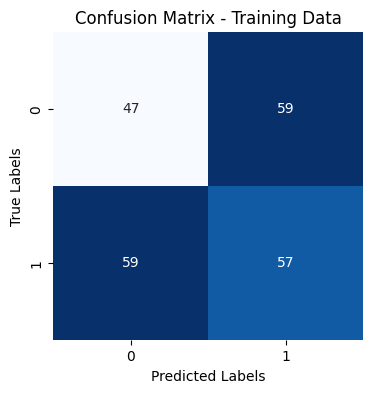

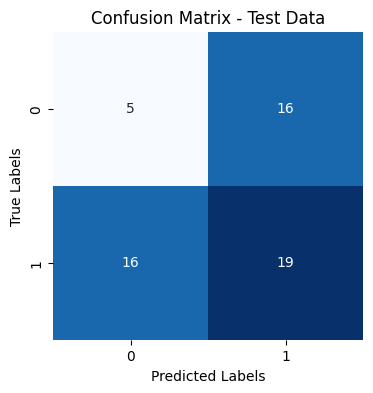

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate predictions for training and test data
X_train_prediction_mislabeled = model_mislabeled.predict(X_train_shuffled)
X_test_prediction_mislabeled = model_mislabeled.predict(X_test_shuffled)

# Calculate confusion matrix for training data
conf_matrix_train = confusion_matrix(Y_train, X_train_prediction_mislabeled)

# Plot confusion matrix for training data
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction_mislabeled)

# Plot confusion matrix for test data
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import numpy as np

input_data = (9.70853,122.3557,100.1092,99.93537,110.8436,-66.42754,133.6083,-103.4482,68.95372,-38.08016,38.32257,28.61746,47.02712,83.12651,60.613,95.69061,168.7161,-27.43546,172.7243,35.05771,166.6207,60.96799,166.2231,60.91788,81.42306,99.16441,57.28734,222.9198,47.76531,325.207,47.9875,352.1853,118.5769,100.8356,102.1835,204.5766,72.5118,280.2395,76.92496,303.3363,119.393,-44.29076,73.02831,113.4566,68.82268,90.67191,158.702,63.28267,153.2141,58.86432,-38.08016,-103.4482,303.3363,352.1853,1,1,-1,-1)

# change input data into numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the numpy array
input_reshaped = input_data_as_np_array.reshape(1,-1)

# Assuming 'scaler' and 'model' are defined elsewhere in your code
# standardize the input data
standard_data = scaler.transform(input_reshaped)

prediction = model.predict(standard_data)
print(prediction)

if prediction[0] == 0:
    print('This person is healthy')
else:
    print("This person has Parkinson's disease")


[1]
This person has Parkinson's disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
